In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('default')

df = pd.read_csv("/datc/opschaler/combined_gas_smart_weather_dfs/processed/P01S01W6495_hour.csv",header=0,delimiter="\t",parse_dates = ['datetime'])
df = df.set_index(['datetime'])

df1h =  df.resample('H').mean()
df3h = df.resample('3H').mean()
df6h = df.resample('6H').mean()
df12h = df.resample('12H').mean()
df1d = df.resample('1D').mean()
df1w = df.resample('1W').mean()
df1m = df.resample('1M').mean()

In [31]:
df1w.head()

,eMeter,eMeterReturn,eMeterLow,eMeterLowReturn,ePower,ePowerReturn,gasMeter,gasPower,DD,DR,...,P,Q,RG,SQ,T,T10,TD,U,VV,WW
datetime,,,,,,,,,,,,,,,,,,,,,
2017-04-30,1294.877316,0.0,1497.094797,0.0,208.925763,0.0,925.838159,0.050602,222.166582,35.947436,...,1013.197245,208.606410,0.080459,3.210664,8.045000,7.587350,2.990556,72.103205,35188.117521,12.744231
2017-05-07,1310.731056,0.0,1515.645335,0.0,246.565663,0.0,930.546135,0.026071,116.799762,52.958333,...,1016.689861,148.275595,0.091528,1.442090,10.954603,10.734514,7.486696,79.646726,24377.014881,12.032540
2017-05-14,1326.926644,0.0,1539.359805,0.0,198.239905,0.0,934.978257,0.021613,179.541825,30.090476,...,1011.437887,213.772421,0.076885,3.076877,12.257004,11.841766,7.705893,75.254365,24750.997024,10.795238
2017-05-21,1341.548977,0.0,1557.023233,0.0,182.683193,0.0,938.459717,0.022911,188.678820,23.122619,...,1019.298492,214.980556,0.021558,2.799714,16.438393,16.115446,10.714732,70.975694,34416.859127,6.962302
2017-05-28,1351.827151,0.0,1575.805676,0.0,162.176714,0.0,942.277519,0.021940,180.557827,0.000000,...,1020.189554,297.435516,0.000000,5.037166,18.320417,18.065208,11.856339,68.327282,32450.050893,3.376488


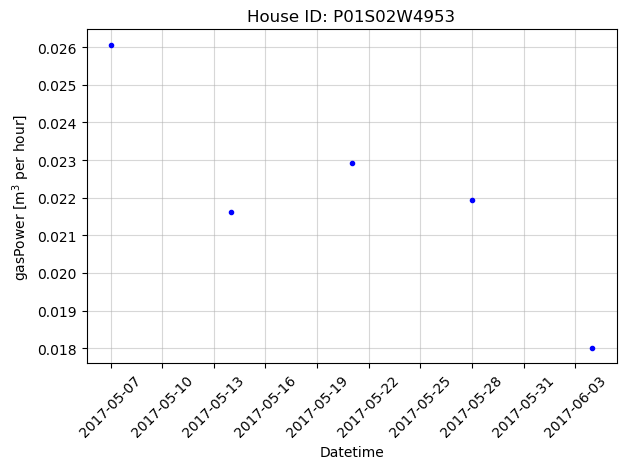

In [57]:
plt.title('House ID: P01S02W4953')

plt.plot(df1w.index[1:6], df1w['gasPower'][1:6], '.', color='b', linewidth=1)
plt.xlabel('Datetime')
plt.ylabel('gasPower [m$^3$ per hour]')
plt.xticks(rotation=45)
plt.grid(alpha=0.5)
plt.tight_layout()
#plt.savefig('sample1.png', dpi=500)

plt.show()

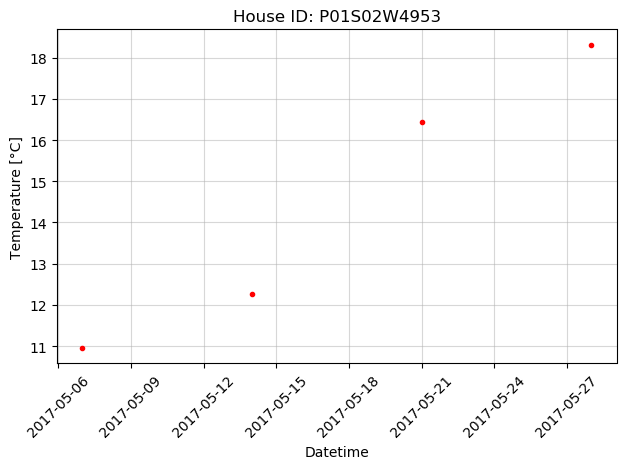

In [58]:
plt.title('House ID: P01S02W4953')

plt.plot(df1w.index[1:5], df1w['T'][1:5], '.', color='r', linewidth=1)
plt.xlabel('Datetime')
plt.ylabel('Temperature [°C]')
plt.xticks(rotation=45)
plt.grid(alpha=0.5)
plt.tight_layout()
#plt.savefig('sample2.png', dpi=1000)

plt.show()

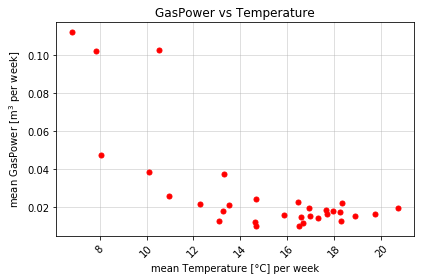

In [6]:
plt.title('GasPower vs Temperature')

plt.plot(df1w['T'][:],df1w['gasPower'][:], '.', color='r', ms=10)
plt.ylabel('mean GasPower [m$^3$ per week]')
plt.xlabel('mean Temperature [°C] per week')
plt.xticks(rotation=45)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.savefig('sample2.png', dpi=1000)

plt.show()

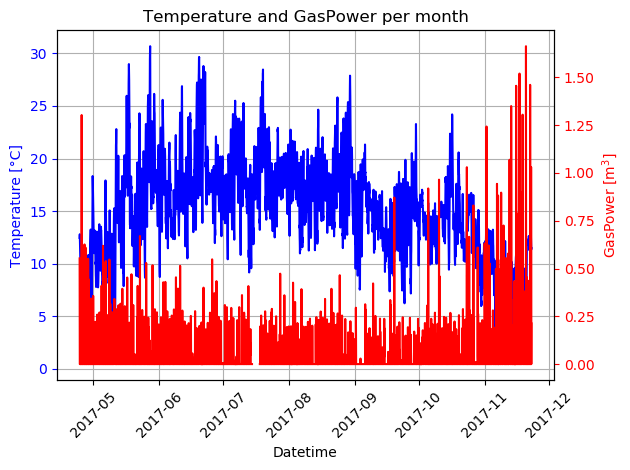

In [30]:
fig, ax1 = plt.subplots()
ax1.plot(df.index[:], df['T'], 'b-')
plt.title('Temperature and GasPower per month')
ax1.set_xlabel('Datetime')
plt.xticks(rotation=45)
#Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Temperature [°C]', color='b')
ax1.tick_params('y', colors='b')
plt.grid()
fig.tight_layout()

ax2 = ax1.twinx()
ax2.plot(df.index[:], df['gasPower'], 'r-')
ax2.set_ylabel('GasPower [m$^3$]', color='r')
ax2.tick_params('y', colors='r')
fig.tight_layout()

#plt.savefig('sample1mon.png', dpi=1000)
plt.show()